## 데이터 설명
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount

- hotel: 호텔 종류
- is_canceled: 캔슬 여부 (1: yes / 0: no)
- lead_time: 예약한 날짜와 호텔에 도착 한 날짜 사이의 경과일
- arrival_date_year: 호텔 도착 연도
- arrival_date_month: 호텔 도착 월
- arrival_date_week_number: 호텔 도착 주
- arrival_date_day_of_month: 호텔 도착 일
- stays_in_weekend_nights: 주말 숙박 일수 (토요일,일요일)
- stays_in_week_nights: 평일 숙박 일수
- adults: 성인 인원 수
- children: 아동/청소년 인원 수
- babies: 유아 인원 수
- meal: 식사 예약 종류
- country : 호텔 위치 국가
- market_segment: 마켓 구분(TA: Travel Agent / TO: Tour Operators)
- distribution_channel: 예약 채널(TA: Travel Agent / TO: Tour Operators)
- is_repeated_guest: 재방문 고객 여부(1: yes / 0: no)
- previous_cancellations: 이번 예약 전에 고객이 취소한 예약 수
- previous_bookings_not_canceled: 이번 예약 전에 고객이 취소하지 않은 예약 수
- reserved_room_type: 예약 객실 타입
- assigned_room_type: 배정된 객실 타입
- booking_changes: 예약 후 예약 변경/수정 횟수
- deposit_type: 보증금 타입
- agent: 예약 에이전트(ID 로 대체)
- company: 예약 회사명(ID 로 대체)
- days_in_waiting_list: 예약 확정 전까지 대기 명단에 있었던 기간
- customer_type: 고객 유형
- adr: 평균 일일 숙박비
- required_car_parking_spaces: 주차 공간을 요구하는 차량 대수
- total_of_special_requests: 특별한 요청 수
- reservation_status: 마지막 예약 상태
- reservation_status_date: 마지막 예약 상태가 설정된 일자



| 목표: hotel booking cancellation eda and prediction   
종속변수: is_canceled

## 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)

import folium
from folium.plugins import HeatMap
import plotly.express as px

In [4]:
df = pd.read_csv('data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
(df.isnull().sum()/df.shape[0] * 100).nlargest()

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
hotel        0.000000
dtype: float64

## EDA

In [9]:
df['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

In [32]:
df['ym'] = df['arrival_date_year'].astype('str') + '-' + df['arrival_date_month'].astype('str')

<AxesSubplot: xlabel='arrival_date_year', ylabel='count'>

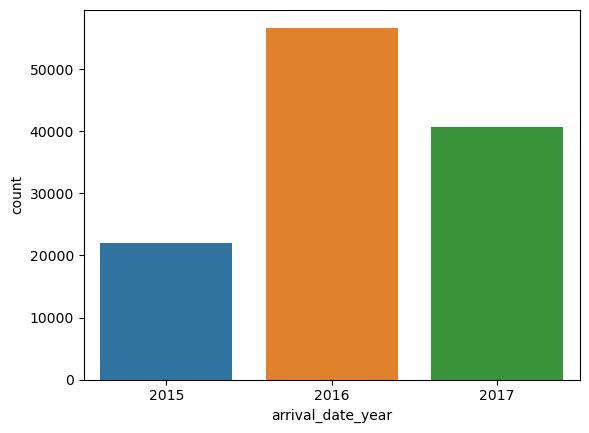

In [23]:
sns.countplot(data=df, x='arrival_date_year')

<AxesSubplot: xlabel='arrival_date_month', ylabel='count'>

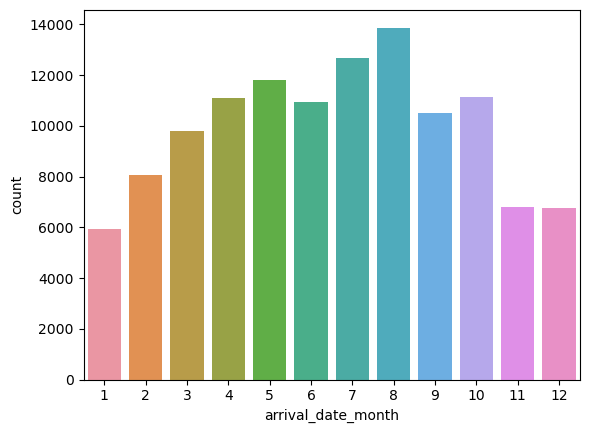

In [28]:
sns.countplot(data=df, x=df['arrival_date_month'].astype('int'))

<AxesSubplot: xlabel='arrival_date_day_of_month', ylabel='count'>

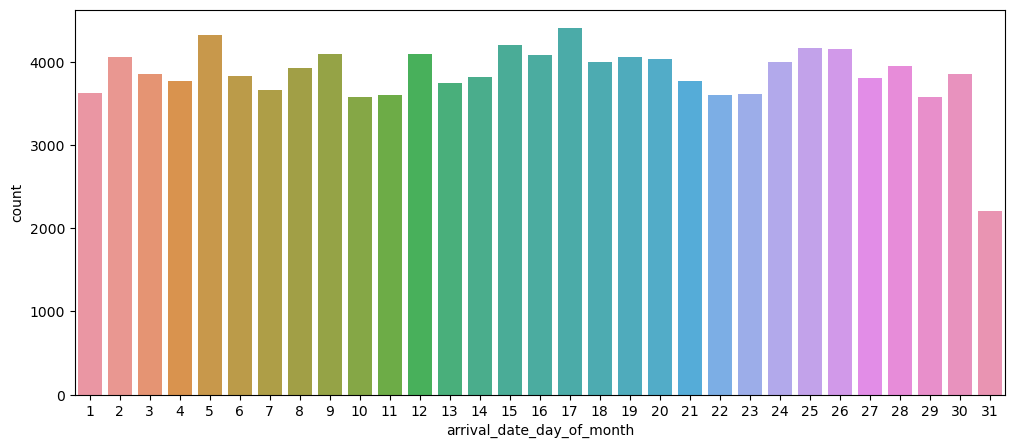

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x=df['arrival_date_day_of_month'].astype('int'))

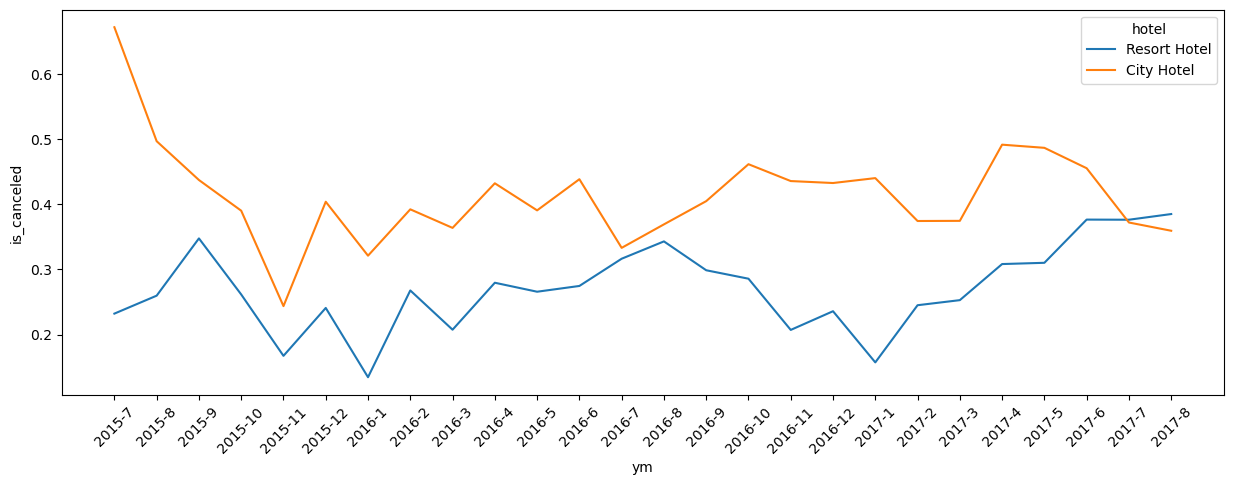

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='ym', y='is_canceled', hue='hotel', errorbar=None)
plt.xticks(rotation=45);

In [42]:
df['stays_in_weekend_nights']

0         0
1         0
2         0
3         0
4         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: stays_in_weekend_nights, Length: 119390, dtype: int64

In [43]:
df['stays_in_week_nights']

0         0
1         0
2         1
3         1
4         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 119390, dtype: int64